### This notebook walks through training a CNN Model on the MNIST data using Keras and Tensorflow...
1. Load Data and Reshape
2. Build Model
3. Train / Test
4. Build interactive OpenCV GUI for playing

#### import ploting library...

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib notebook

#### Import the MNIST dataset using the keras api

In [2]:
from keras.datasets import mnist
# load data...
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# check dimensions...
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Using TensorFlow backend.


Train:  (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


##### Looks like we have 60k images of 28, 28 pixels.  These images are single-channel, i.e. black and white... If these were color images, then we would see dimensions of (60000, 28, 28, 3)... 3 channels for Red-Green-Blue (RGB) or Blue-Green-Red (BGR), depending on the order of the color channels...

#### Show an image and check data...

<IPython.core.display.Javascript object>


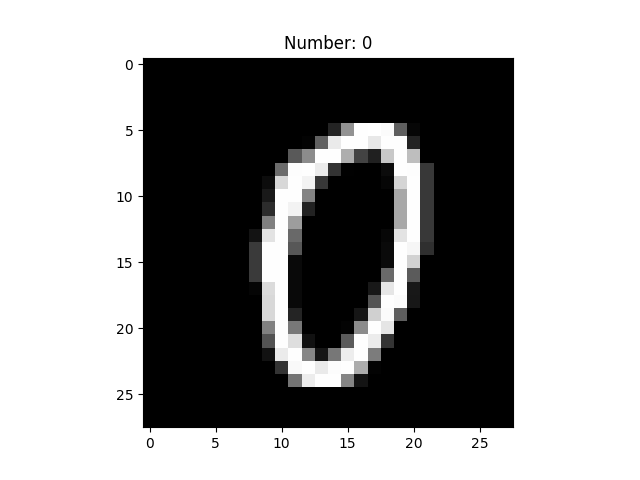

In [3]:
# select a number [0, 60000)...
idx = 1000

# plot image...
plt.figure()
plt.title('Number: %s'%y_train[idx])
plt.imshow(X_train[idx], cmap='gray')

### Image Processing...

#### Reshape (28, 28) to (28, 28, 1)... and Normalized Image Data... from uint8 to float32 over the range [0,1]

In [4]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32') / 255.
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32') / 255.

In [5]:
print(X_train.shape)

(60000, 28, 28, 1)


##### now we have explicity created a one-channel dataset... and normalized it between [0, 1]... alternatively, you might normalize it more correctly as Gaussian distributed about zero with a variance of one... this would help with training but for this example, as you'll see, it doesn't really matter...

#### Encode numbers from 0-9 into 10-dimensional vectors... this is called one-hot encoding... i.e. 0 -> [1, 0, 0, ..., 0] and 1 -> [0, 1, 0, 0, ..., 0], etc.

In [6]:
# import to_categorial function that does the one-hot encoding...
from keras.utils import to_categorical

# encode both training and testing data...
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

### Build CNN Model...

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

In [9]:
img_shape = X_train[0].shape
print(img_shape)

(28, 28, 1)


In [19]:
model = Sequential()

# Convolutional Section...
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=img_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=img_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(rate=0.25))

# Fully Connected Section...
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
__________

### Train model...

In [24]:
n_epochs = 2
model.fit(X_train, y_train, batch_size=32, epochs=n_epochs, verbose=True)

Epoch 1/1
60000/60000 [==============================] - 478s - loss: 0.0609 - acc: 0.9820   


In [25]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print('Test Accuracy: ', accuracy)

10000/10000 [==============================] - 25s    
Test Accuracy:  0.9903


In [26]:
# save model for retrieval at later date...
model.save('./MNIST_CNN')

### Build interactive notepad...

In [27]:
import cv2
import numpy as np

#### The code below will create an OpenCV popup window... the window can be closed using the 'esc' key... and we can draw in the window by holding the left-mouse button and moving the mouse within the window...

In [28]:
def record_location(event, x, y, flags, param):
    '''callback function that draws a circle at the point x, y...'''
    if flags == cv2.EVENT_FLAG_LBUTTON and event == cv2.EVENT_MOUSEMOVE:
        cv2.circle(img, (x,y), 10, (255, 255, 255), -1)

[[  1.33561420e-08   8.63793446e-07   1.34967343e-06   1.53683331e-07
    9.99947548e-01   3.52716683e-08   9.45144336e-07   7.67614256e-06
    2.53522394e-05   1.60953878e-05]]


<IPython.core.display.Javascript object>


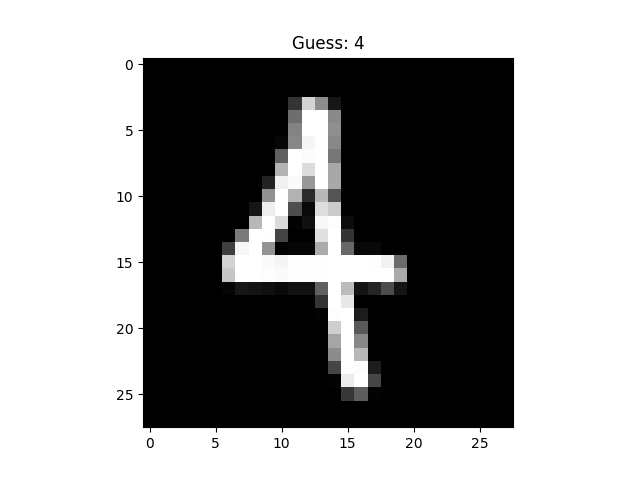

In [30]:
img = np.zeros((256, 256, 3), np.uint8)

cv2.namedWindow('image')
cv2.setMouseCallback('image', record_location)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()

# copy one color channel and normalize values...
_img = img[:,:,0] / 255.0
# resize image to (28, 28)
_img = cv2.resize(_img, (28, 28), interpolation=cv2.INTER_AREA).reshape(1, 28, 28, 1)

p = model.predict(_img)
print(p)
plt.figure()
plt.title('Guess: %s' %p.argmax())
plt.imshow(_img[0][:,:,0], cmap='gray')